# P1: Test a Perceptual Phenomenon

### Sangyoon Park | 15 FEB 2016

#### 1. What is our independent variable? What is our dependent variable?

Our independent variable is congruence/match between the name of a color word and the color in which it is printed. Hence, our independent variable has two levels: congruence (match) and incongruence (mismatch).

Our dependent variable is the time it takes to name the ink colors in equally-sized lists. Hence, our dependent variable is a continuous variable.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Our null hypothesis is that the task performance does not (statistically) differ between the congruent and incongruent conditions. Our alternative hypothesis is that the task performance (statistically) differs between the two conditions. In notation:

$$ H_{0}: \mu_{C} - \mu_{I} = 0 $$
$$ H_{A}: \mu_{C} - \mu_{I} ≠ 0 $$

where $\mu_{C}$ and $\mu_{I}$ are population means for the congruent and incongruent conditions, respectively. Or, using $\mu_{D} = \mu_{C} - \mu_{I}$:

$$ H_{0}: \mu_{D} = 0 $$
$$ H_{A}: \mu_{D} ≠ 0 $$

Since we are working with a sample of the size below 30 and do not know the population parameters (specifically the population standard deviation), we employ the t-test to examine our hypotheses [1]. Specifically, as we are comparing two different conditions *within* the same participants (i.e. repeated measures design), we need to employ the dependent samples t-test. This statistical test assumes the sample of differences is *approximately* normal, but the test is "robust" to violations of normality [2]. Also, the t-test should be two-tailed as we do not have sufficient ground to presume a certain direction for the potential difference.

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import pandas as pd
stroopdatad_df = pd.read_csv('stroopdata.csv')
congruent = stroopdatad_df['Congruent']
incongruent = stroopdatad_df['Incongruent']
difference = stroopdatad_df['Congruent'] - stroopdatad_df['Incongruent']

print '< Congruent Condition >'
print congruent.describe()
print 'median    ', congruent.median()
print 'IQR        ', congruent.describe()['75%'] - congruent.describe()['25%']

print '\n< Incongruent Condition >'
print incongruent.describe()
print 'median    ', incongruent.median()
print 'IQR       ', incongruent.describe()['75%'] - incongruent.describe()['25%']

print '\n< Difference >'
print difference.describe()
print 'median    ', difference.median()
print 'IQR         ', difference.describe()['75%'] - difference.describe()['25%']

< Congruent Condition >
count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64
median     14.3565
IQR         4.3055

< Incongruent Condition >
count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64
median     21.0175
IQR        5.33475

< Difference >
count    24.000000
mean     -7.964792
std       4.864827
min     -21.919000
25%     -10.258500
50%      -7.666500
75%      -3.645500
max      -1.950000
dtype: float64
median     -7.6665
IQR          6.613


To summarize:

|          | Congruent | Incongruent | Difference |
| --------:|:---------:|:-----------:|:----------:|
| Mean     | 14.05     | 22.02       |  -7.96     |
| Median   | 14.36     | 21.02       |  -7.67     |
| Min      |  8.63     | 15.69       | -21.92     |
| Max      | 22.33     | 35.26       |  -1.95     |
| IQR      |  4.31     |  5.33       |   6.61     |
| SD       |  3.56     |  4.80       |   4.86     |


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

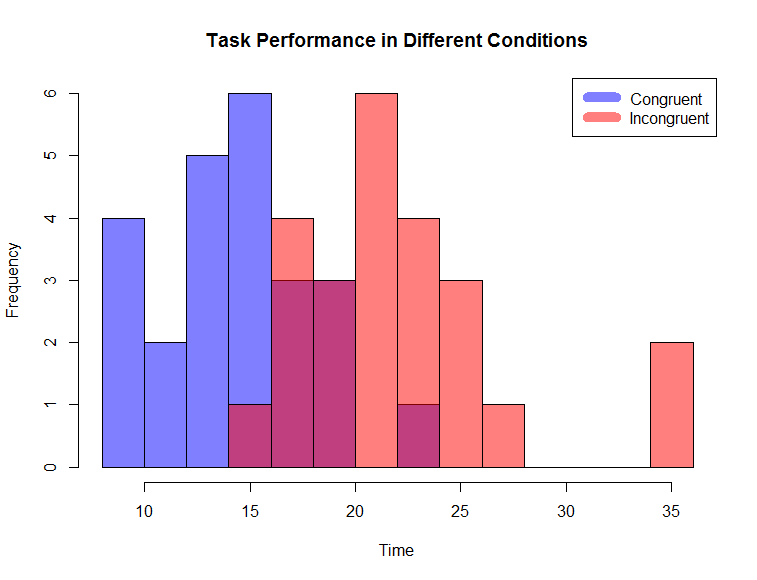

In [2]:
## The following plots were constructed through R.
## The script is included in my GitHub repo at:
## https://github.com/yoondata/udacity-DAND-P1
from IPython.display import Image
Image("C:/Users/Sangyoon Park/Desktop/Udacity_DAND/P1/performance_hist.png")

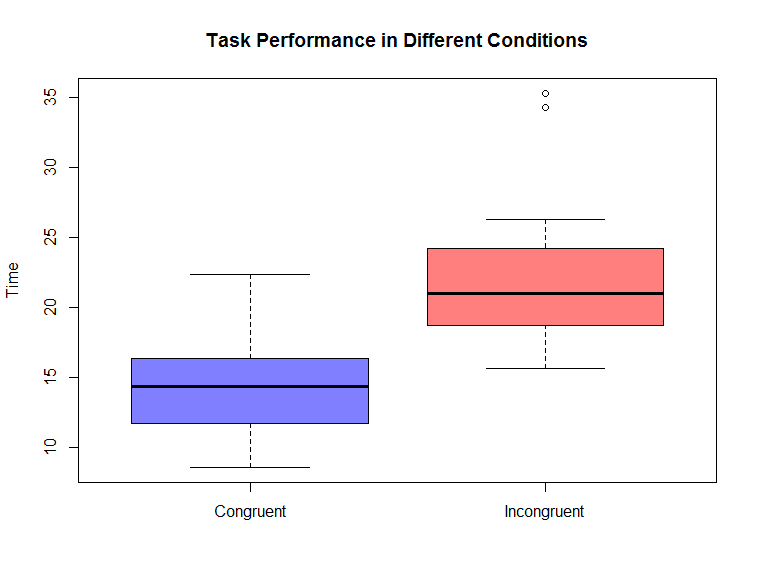

In [3]:
Image("C:/Users/Sangyoon Park/Desktop/Udacity_DAND/P1/performance_box.png")

Both congruent and incongruent conditions display an approximately normal distribution. However, it need to be noted that the incongruent condition has some outliers, which explains the larger variability in the incongruent condition.

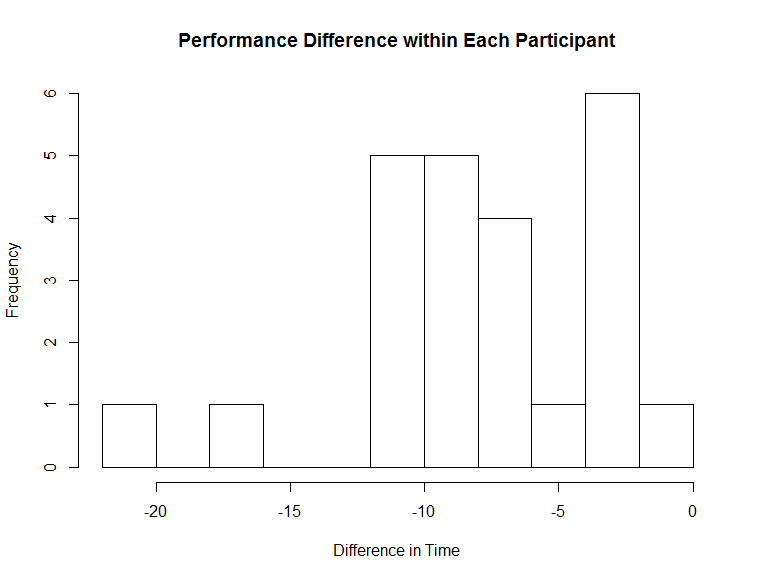

In [4]:
Image("C:/Users/Sangyoon Park/Desktop/Udacity_DAND/P1/difference_hist.png")

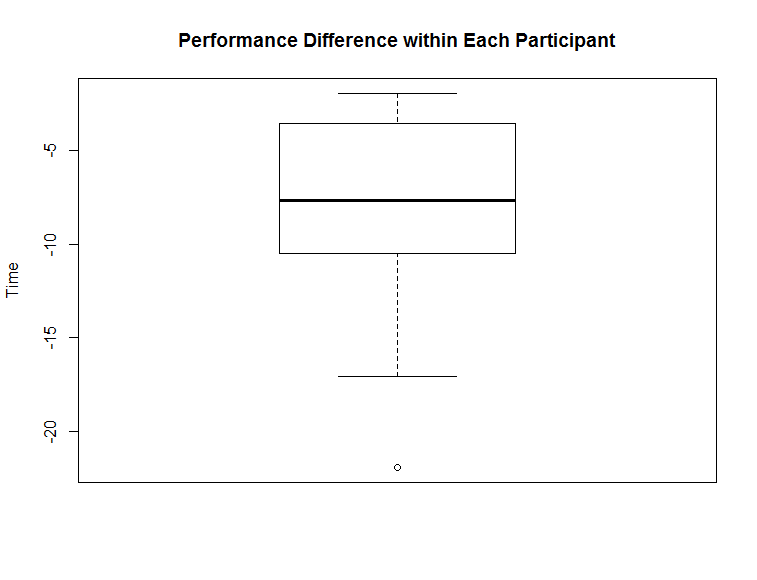

In [5]:
Image("C:/Users/Sangyoon Park/Desktop/Udacity_DAND/P1/difference_box.png")

Although performance difference within each participant displays a negatively skewed distribution, the skew is not substantial and we can claim the distribution is *approximately* normal. Since the dependent t-test is "robust" to violations of normality [2], we proceed with our choice of the test.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

The sample of performance differences has the size of $n = 24$, so its degrees of freedom is $df = 23$. With $\alpha = .05$, the critical t-values are $t_{critical} = ±2.069$. Since the sample has the mean of $M = -7.96$ and standard deviation of $s = 4.86$, its t-statistic is $t = -8.02$. This produces the 95% confidence interval of $-7.96 ± 2.05 = (-10.01, -5.91)$. We see that the sample lies in the critical region, so we reject our null hypothesis. In other words, we conclude that the task performance significantly differs between the congruent and incongruent conditions. Specifically, the result shows lower performance in the incongruent condition and suggests that the stimuli mismatch negatively affects the task performance. This result is consistent with my initial expectation that mismatch between the word and the color in which it is printed will make it more difficult to name the color while match will make the task easier. Finally, the effect size was very large with $d = 1.64$.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Although different theories exist that explain the Stroop effect, their common gist seems that two incongruent stimuli activate different cognitive representations which compete for the central attentional and executive functions [3]. This cognitive "rivalry" then results in impeded response behavior. In contrast, if the entering stimuli are congruent, then they help each other to reinforce activation of the common cognitive representation, resulting in unimpeded and even enhanced response behavior. The similar effect can be observed in a task where the participant evaluates inequality of two different numbers, the (numerically) larger of which is printed in a smaller font size [3]. Presented with the incongruence between numerical and physical inequalities, the participant tends to perform worse. The effect is also relevant to what social psychologists have observed through the implicit-association test (IAT), where task performance tends to deteriorate when a certain descriptive word (e.g., good) is presented in conjunction with a social stimulus that is often associated with the opposite descriptive word (e.g., the face of a black person) [4].

### References
* [1] A webpage illustrating requirements of the t-test: http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/
* [2] A webpage illustrating assumptions of the dependent t-test: https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php
* [3] A Wikipedia page on the Stroop effect: https://en.wikipedia.org/wiki/Stroop_effect
* [4] A YouTube video that demonstrates the IAT for racial prejudice: https://www.youtube.com/watch?v=n5Q5FQfXZag